In [1]:
# ==============================================
# CUSTOMER CHURN PREDICTION PROJECT
# Dataset: Telco Customer Churn (Kaggle)
# Author: Daniel Godfrey
# ==============================================

In [2]:

# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [6]:
# LOAD DATA
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Telco-Customer-Churn.csv")
print(f"Dataset shape: {df.shape}")
print(df.head())

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (2).csv
Dataset shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             N

In [7]:
# BASIC CLEANING
# Remove customerID (irrelevant)
df.drop('customerID', axis=1, inplace=True)

In [8]:

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
# Handle missing values
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [10]:

# Convert target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [11]:
# EXPLORATORY DATA ANALYSIS (EDA)
print(df.describe())
print("\nChurn Rate:")
print(df['Churn'].value_counts(normalize=True))

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn
count    7043.000000  7043.000000     7043.000000   7043.000000  7043.000000
mean        0.162147    32.371149       64.761692   2281.916928     0.265370
std         0.368612    24.559481       30.090047   2265.270398     0.441561
min         0.000000     0.000000       18.250000     18.800000     0.000000
25%         0.000000     9.000000       35.500000    402.225000     0.000000
50%         0.000000    29.000000       70.350000   1397.475000     0.000000
75%         0.000000    55.000000       89.850000   3786.600000     1.000000
max         1.000000    72.000000      118.750000   8684.800000     1.000000

Churn Rate:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


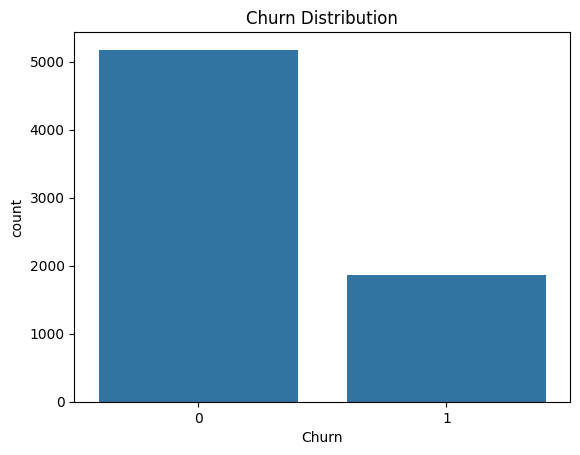

In [12]:
# Plot churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

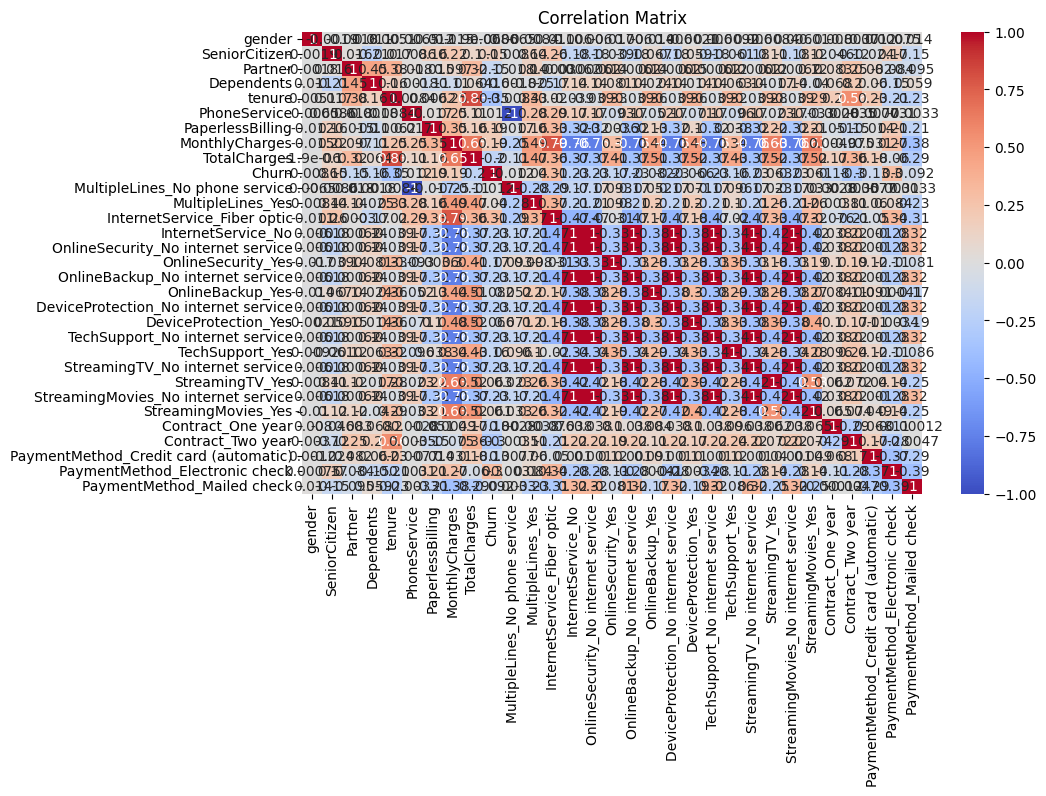

In [25]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Check correlation with numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# FEATURE ENCODING
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Label encode binary columns
for col in cat_cols:
    if df[col].nunique() == 2:
        df[col] = LabelEncoder().fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

In [15]:

# FEATURE SCALING
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [16]:
# TRAIN-TEST SPLIT
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

In [17]:
# MODEL TRAINING & EVALUATION FUNCTION
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f} | ROC-AUC: {roc:.4f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(type(model).__name__)
    plt.show()


--- Logistic Regression ---
Accuracy: 0.8052 | ROC-AUC: 0.7245
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1294
           1       0.66      0.55      0.60       467

    accuracy                           0.81      1761
   macro avg       0.75      0.72      0.74      1761
weighted avg       0.80      0.81      0.80      1761



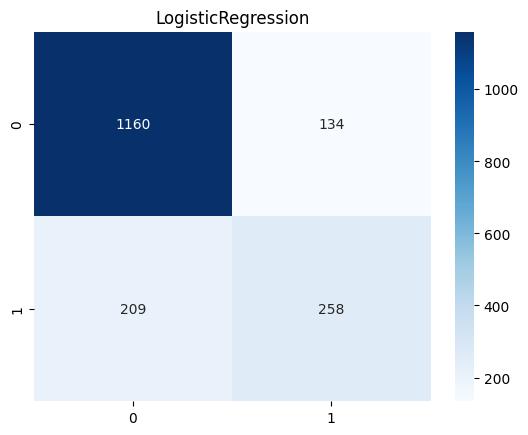

In [18]:
# LOGISTIC REGRESSION
print("\n--- Logistic Regression ---")
log_model = LogisticRegression(max_iter=1000)
evaluate_model(log_model, X_train, y_train, X_test, y_test)


--- Random Forest ---
Accuracy: 0.7905 | ROC-AUC: 0.6959
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1294
           1       0.63      0.49      0.56       467

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



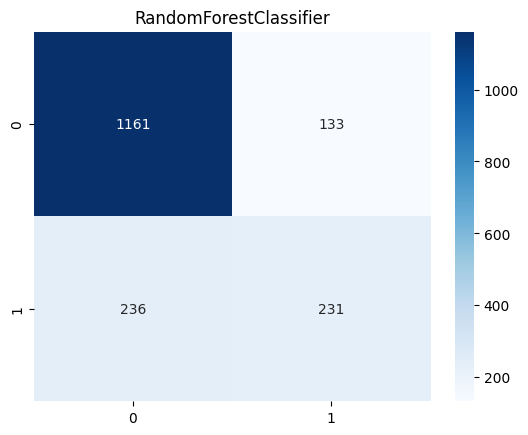

In [19]:
# RANDOM FOREST
print("\n--- Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
evaluate_model(rf_model, X_train, y_train, X_test, y_test)


--- XGBoost ---
Accuracy: 0.7865 | ROC-AUC: 0.7035
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1294
           1       0.61      0.53      0.57       467

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



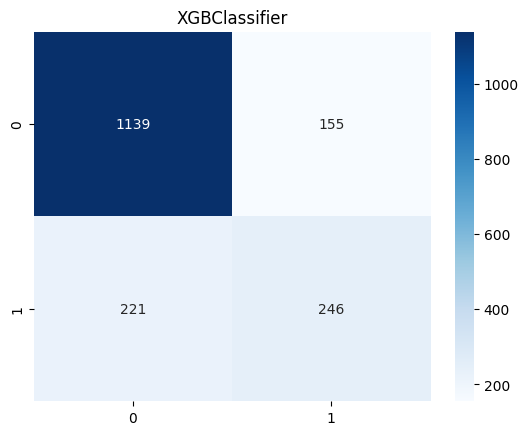

In [20]:
# XGBOOST CLASSIFIER
print("\n--- XGBoost ---")
xgb_model = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

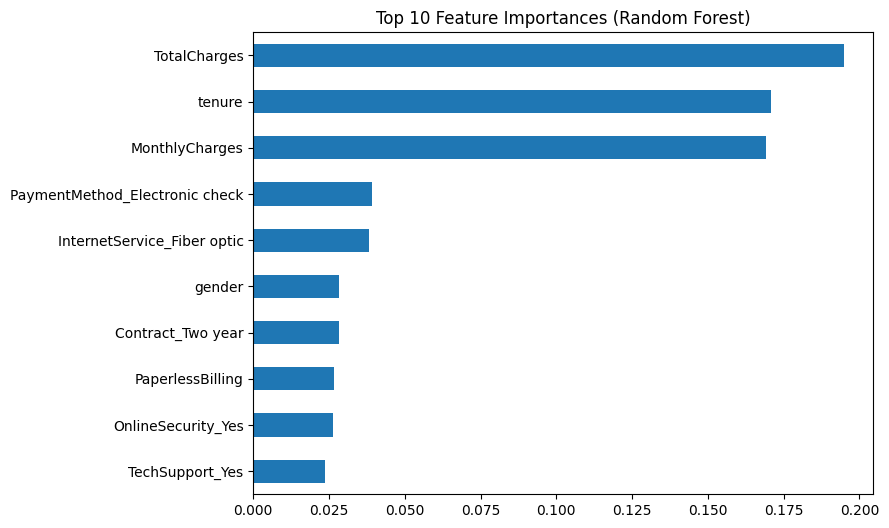

In [21]:
# FEATURE IMPORTANCE
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

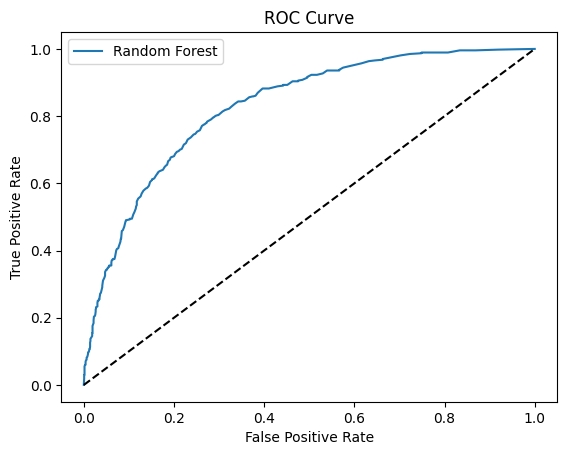

In [22]:
# ROC CURVE (Best Model)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [24]:

print("Done! Model training and evaluation complete.")

Done! Model training and evaluation complete.
